### IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATASET

In [4]:
df = pd.read_csv("cardio_train.csv",sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
dataset = df.copy()

### ABOUT THE DATASET

In [6]:
print("no of rows and columns: ",df.shape)

no of rows and columns:  (70000, 13)


In [7]:
print("number of elements: ",df.size)

number of elements:  910000


In [8]:
df.columns


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

- Cardiovascular disease occurrence - This is a target variable which provides the information about the presence or absence of cardiovascular disease. In the 'cardio' column, the value '0' means absence of cardiovascular disease and '1' means presence of cardiovascular disease. The name of this 'cardio' column should be changed into 'cvd' for better understanding. In this dataset, near about half of the subjects have cardiovascular diseases.

**ABOUT THE FEATURES:**
- 'id'          : Identification number or unique identifier for each individual.
- 'age'         : Age of the individual in years.
- 'gender'      : Gender of the individual (e.g., male or female).
- 'height'      : Height of the individual, usually measured in centimeters.
- 'weight'      : Weight of the individual, typically measured in kilograms.
- 'ap_hi'       : Systolic blood pressure (high value).
- 'ap_lo'       : Diastolic blood pressure (low value).
- 'cholesterol' : Cholesterol level, categorized into different levels (e.g., normal, high).
- 'gluc'        : Glucose level, categorized into different levels (e.g., normal, high).
- 'smoke'       : Binary indicator of whether the individual is a smoker (1 for yes, 0 for no).
- 'alco'        : Binary indicator of whether the individual consumes alcohol (1 for yes, 0 for no).
- 'active'      : Binary indicator of whether the individual is physically active (1 for yes, 0 for no).
- 'cardio'      : Binary target variable indicating the presence or absence of cardiovascular disease (1 for presence, 0 for absence).

### MISSING VALUES AND DUPLICATES

In [9]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

- there is no null values in the dataset

In [10]:
df.duplicated().any()

False


- false means there doesn't exist any duplicate values

### EXPLORING DATA

In [11]:

df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [12]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [13]:


df["age"].unique()

array([18393, 20228, 18857, ..., 14925, 17727, 17926], dtype=int64)

- column "age" is in unit of days,instead of years.
- to know the age of patients we can change data from days to years

In [14]:
df["age"] = df["age"].apply(lambda x: round(x/365))
# dividing each age value by 365 and then rounding the result
# convert ages from days to years and rounds them to the nearest whole year

In [15]:
df["age"].sample(5)

63371    44
47047    54
44882    54
32025    52
49172    42
Name: age, dtype: int64

- it shows that age is converted

### DESCRIPTIVE ANALYSIS

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,53.338686,6.765294,30.0,48.00,54.0,58.00,65.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


- count is 7000 represents that there is no null values
- minimum age of patients is 30 and maximum age is 65,so patients included in the age group inclusively between 30 to 65

### UNIVARIATE ANALYSIS

###### age

###### variance of age

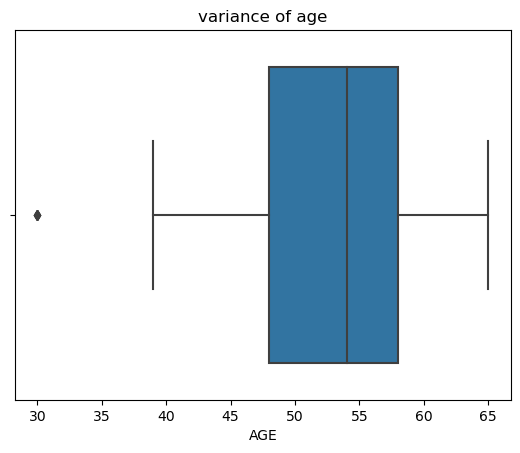

In [17]:
sns.boxplot(x="age",data=df)
plt.title("variance of age")
plt.xlabel("AGE")
plt.show()

- The age value of patients above 35 is very large.
- median age is 53


######  gender

###### which gender is diseased more?

In [18]:
df['gender'] = df['gender'].map({1: 'Women', 2: 'Men'})


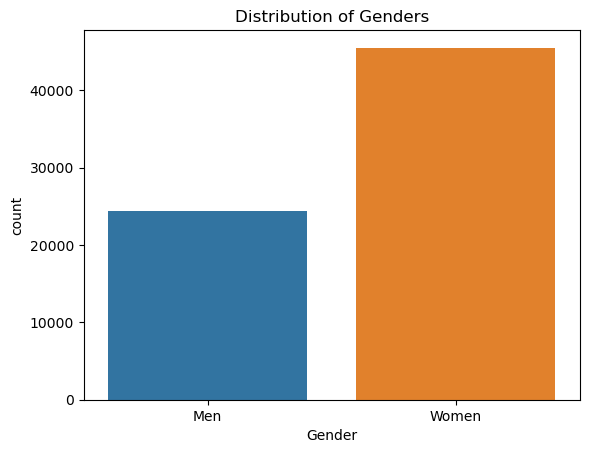

In [19]:
sns.countplot(x="gender", data=df)
plt.title("Distribution of Genders")
plt.xlabel("Gender")
plt.show()

- most of the patients are women

###### height

###### variance of height

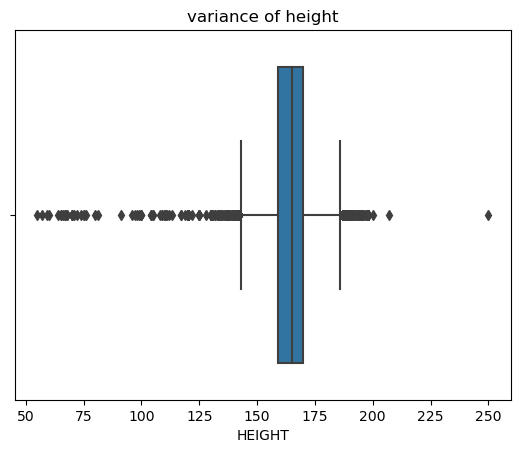

In [20]:
sns.boxplot(x="height",data=df)
plt.title("variance of height")
plt.xlabel("HEIGHT")
plt.show()

- dwarfism : a condition with a person's height falling below a certain threshold. -

- dwarfism, will be taken as a lower limit
- they have an increased risk of cardiovascular diseases, which would affect the data analysis of the focused parameters.
- While the specific threshold can vary, a common definition is a height of 147 centimeters (4 feet 10 inches) or shorter

In [21]:
(df["height"]<147).sum()

671

In [22]:
(df["height"]>200).sum()

2

- The records of patients having height above 200cm should be removed because tall people (tallness due to gigantism, acromegaly or any other medical condition) mostly have a higher risk of atrial fibrillation, heart and varicose veins related problems.


- there are 671 patients with height less than 147 and 2 patients with height than 200,which are outliers

###### weight

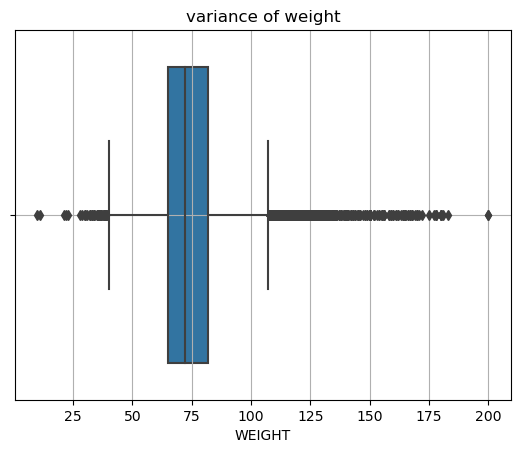

In [23]:
sns.boxplot(x="weight",data=df)
plt.title("variance of weight")
plt.xlabel("WEIGHT")
plt.grid()
plt.show()

In [24]:
df["weight"].min()

10.0

In [25]:
df["weight"].max()

200.0

- The patients who are below 37kg, comes under the abnormal category of adult human weight. The abnormal low weight of patient can confirm their chance of having any particular medical condition (like dwarfism) or any other disease due to which their weight is low and this would affect the data analysis of the focused parameters.
- The patients who are above 110kg, comes under the abnormal category of adult human weight. The abnormal high weight of patient can confirm their chance of having any particular medical condition (like gigantism and acromegaly) or any other disease due to which their weight is high and this would affect the data analysis of the focused parameters.


In [26]:
# Adding a new parameter for Body Mass Index (bmi), a metric used to classify weight per height class.
# This will be a better indicator of health using weight and height.
# BMI = kg/m^2
df["bmi"] = df["weight"] *10000 / ((df["height"])**2)
df.head()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,Men,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,Women,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,Women,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,Men,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,Women,156,56.0,100,60,1,1,0,0,0,0,23.011177


**BMI Class**

The BMI class can be categorised as:
* 0 - Anorexic (BMI <= 15)
* 1 - Underweight (15 < BMI <= 18.5)
* 2 - Normal weight (18.5 < BMI <= 25)
* 3 - Overweight (25 < BMI <= 30)
* 4 - Obesity Class-I (30 < BMI <= 35)
* 5 - Obesity Class-II (35 < BMI <= 40)
* 6 - Obesity Class-III (BMI > 40)


In [27]:
# Now the bmi can be split into classes of bmi, which would help understand the data more.
bmi_ranges = [
    (df["bmi"] <= 15),                         # 0 - Anorexic
    (df["bmi"] > 15) & (df["bmi"] <= 18.5),    # 1 - Underweight
    (df["bmi"] > 18.5) & (df["bmi"] <= 25),    # 2 - Normal weight
    (df["bmi"] > 25) & (df["bmi"] <= 30),      # 3 - Overweight
    (df["bmi"] > 30) & (df["bmi"] <= 35),      # 4 - Obesity Class I
    (df["bmi"] > 35) & (df["bmi"] <= 40),      # 5 - Obesity Class II
    (df["bmi"] > 40)                           # 6 - Obesity Class III 
]

classes = [0, 1, 2, 3, 4, 5, 6]

df["bmi_class"] = np.select(bmi_ranges, classes)
# np.select() is used to assign the appropriate class label to each row in the DataFrame based on the conditions in bmi_ranges.
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class
0,0,50,Men,168,62.0,110,80,1,1,0,0,1,0,21.967120,2
1,1,55,Women,156,85.0,140,90,3,1,0,0,1,1,34.927679,4
2,2,52,Women,165,64.0,130,70,3,1,0,0,0,1,23.507805,2
3,3,48,Men,169,82.0,150,100,1,1,0,0,1,1,28.710479,3
4,4,48,Women,156,56.0,100,60,1,1,0,0,0,0,23.011177,2


In [28]:
anorexic     = df[df["bmi"]<=15]
underweight  = df[(df["bmi"]>15) & (df["bmi"]<=18.5)]
normalweight = df[(df["bmi"]>18.5) & (df["bmi"]<=25)]
overweight   = df[(df["bmi"]>25) & (df["bmi"]<=30)]
obesity_1    = df[(df["bmi"]>30) & (df["bmi"]<=35)]
obesity_2    = df[(df["bmi"]>35) & (df["bmi"]<=40)]
obesity_3    = df[df["bmi"]>40]

In [29]:
bmi_df = pd.DataFrame([["anorexic","underweight","normalweight","overweight","obesity_1","obesity_2","obesity_3"]])

In [30]:
sizes = [
    len(anorexic),
    len(underweight),
    len(normalweight),
    len(overweight),
    len(obesity_1),
    len(obesity_2),
    len(obesity_3)
]


In [31]:
labels = ['Anorexic', 'Underweight', 'Normal Weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']

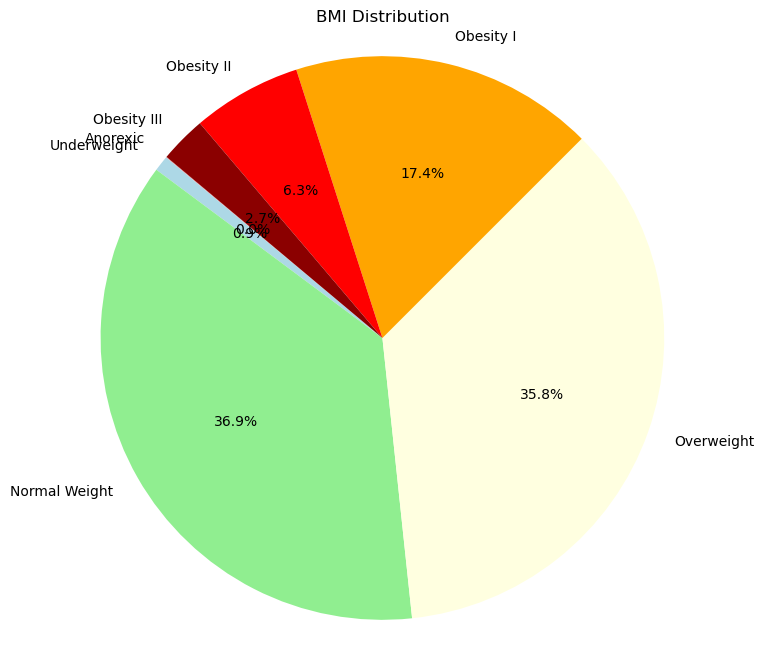

In [32]:
import matplotlib.pyplot as plt

# Define the BMI categories
labels = ['Anorexic', 'Underweight', 'Normal Weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']

# Define colors for each category
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'orange', 'red', 'darkred']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Set aspect ratio to be equal, ensuring that the pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('BMI Distribution')

# Show the plot
plt.show()


In [40]:
#plt.figure(figsize = (12,8))
#plt.pie(sizes, labels=labels,autopct = "%.2f%%")
# to format the percentage display for each wedge
# %.2f formats the percentage value with two decimal places.
#plt.title("BMI Distribution")
#plt.show()

The bmi class 0 (=<15) alludes to an extremely severe case of anorexia in the patient. This 'bmi_class' column will be created as a new label to account for the condition and to assess if it affects the cardio column.

###### ap_hi and ap_ho

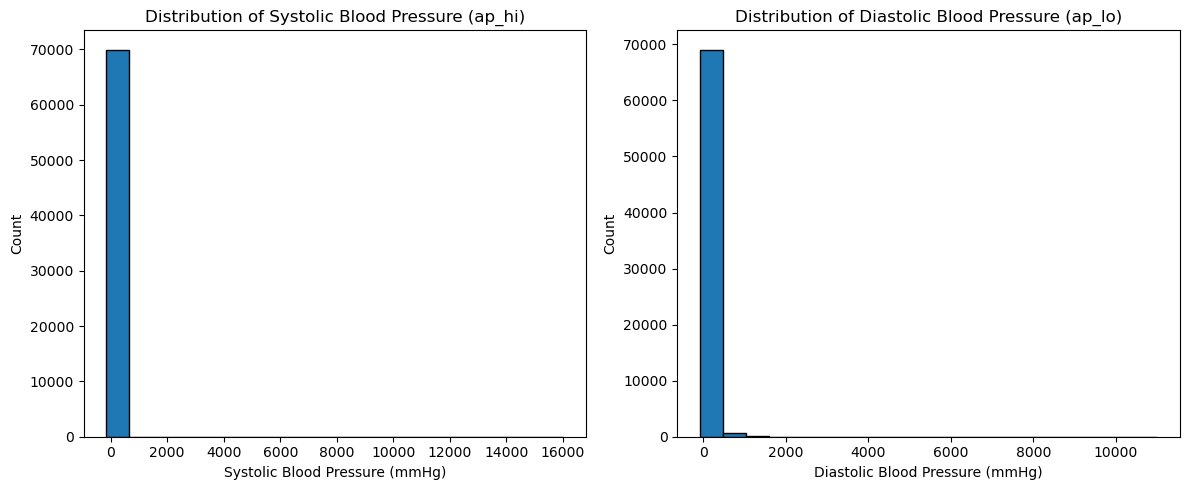

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Distribution of Systolic Blood Pressure (ap_hi)")
plt.hist(df['ap_hi'], bins=20, edgecolor='black')
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.title("Distribution of Diastolic Blood Pressure (ap_lo)")
plt.hist(df['ap_lo'], bins=20, edgecolor='black')
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

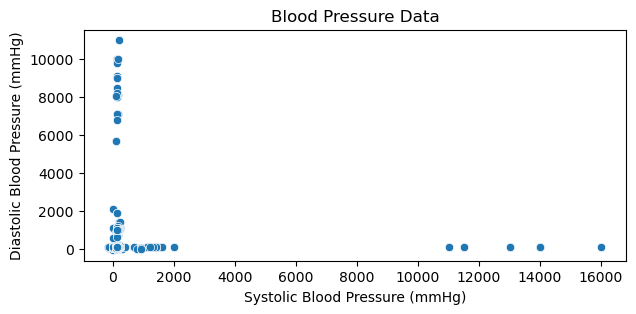

In [35]:
# Checking the blood pressure distribution of 'ap_hi' and 'ap_lo' columns for outliers.
plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = df, x = "ap_hi", y = "ap_lo")

<Axes: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

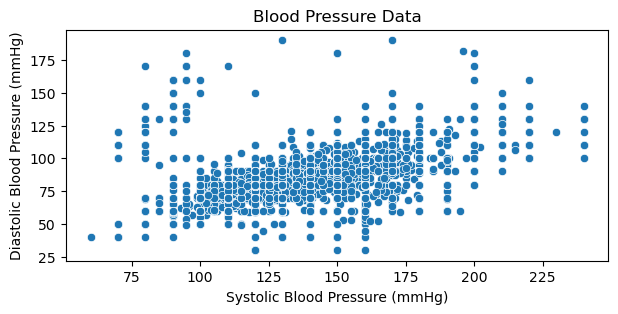

In [36]:
# The range of blood pressure mentioned in the dataset is exceeding out 400mmHg. So, the values of systolic pressure (ap_hi) above 40mm-Hg and below 370mmHg, whereas diastolic pressure (ap_lo) above 20mmHg and below 360mmHg, should be taken into consideration.
plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = df[(df["ap_hi"] < 370) & (df["ap_lo"] < 360) & (df["ap_hi"] > 40) & (df["ap_lo"] > 20)], x = "ap_hi", y = "ap_lo")

In [37]:
# The percentage of number of records of patients having systolic pressure (ap_hi) above 40mmHg and below 370mmHg, whereas diastolic pressure (ap_lo) above 20mmHg and below 360mmHg. 
len(df[(df["ap_hi"] < 370) & (df["ap_lo"] < 360) & (df["ap_hi"] > 40) & (df["ap_lo"] > 20)]) / len(df) * 100

98.25857142857143

In [38]:
# Remove the outliers that are above the blood pressure reading (Systolic/Diastolic) of 370/360 and below 40/20 because these values cannot be considered as the blood pressure value of any human patient.
df = df[(df["ap_hi"] < 370) & (df["ap_lo"] < 360) & (df["ap_hi"] > 40) & (df["ap_lo"] > 20)]

###### Cholesterol
The 'cholesterol' column tells us the level of cholesterol of the patient which is categorised as:
* 1 - Normal
* 2 - Above Normal
* 3 - Well Above Normal

cholesterol options are mentioned by 1 as normal, 2 as above normal and 3 as well above normal

In [39]:
(df["cholesterol"].value_counts()/len(df["cholesterol"])*100).round(decimals = 1)
# round: For rounding off the values.

1    75.0
2    13.5
3    11.5
Name: cholesterol, dtype: float64

- approximately 75.5% of patients have normal, 13.5% have above normal and 11.5% have well above normal level of cholesterol

###### Glucose
This 'gluc' column tells us the level of glucose in the patient which is categorised as:
* 1 - Normal
* 2 - Above Normal
* 3 - Well Above Normal

In [42]:
# Changed the column name 'gluc' into 'glucose'.
df.rename(columns = {"gluc": "glucose"}, inplace = True)
df.sample(4)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio,bmi,bmi_class
51742,73777,50,Women,155,70.0,100,70,1,3,0,0,1,0,29.136316,3
51717,73747,52,Men,170,96.0,120,80,1,1,0,0,1,0,33.217993,4
459,659,52,Women,160,70.0,150,80,1,1,0,0,1,1,27.343750,3
41948,59917,58,Women,157,64.0,110,70,1,1,0,0,1,0,25.964542,3


In [45]:
# To check the percentage of glucose level of the patients.
(df["glucose"].value_counts()/len(df["glucose"])*100).round(decimals = 2) # For rounding off the values.

1    85.01
3     7.61
2     7.38
Name: glucose, dtype: float64

 approximately 85% of patients have normal, 7.6% have above normal and 7.17% have well above normal level of glucose

### Smoking
This 'smoke' column tells us whether the patient smokes or not. The value '0' means that the patient don't smokes whereas value '1' means that the patient smokes.

In [46]:
# To check the percentage of non-smoker and smoker in 'smoke' column.
df["smoke"].value_counts()/len(df["smoke"])*100

0    91.199605
1     8.800395
Name: smoke, dtype: float64

 approximately 91.1% are non-smokers whereas 8.8% are smokers.

###### Alcohol Consumption
This column tells us that whether the patient drink alcohol or not. The value '0' means that the patient don't drink alcohol whereas value '1' means that the patient drink alcohol.

In [48]:
# Rename the name of the column 'alco' to 'alcohol_intake' for better understanding.
df.rename(columns = {'alco':'alcohol_intake'}, inplace = True)

In [49]:
df.sample(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cardio,bmi,bmi_class
21628,30894,52,Men,207,78.0,100,70,1,1,0,1,1,0,18.203459,1
3850,5452,40,Women,151,50.0,100,90,2,1,0,0,0,1,21.928863,2
52727,75219,48,Women,148,52.0,120,80,1,1,0,0,1,0,23.739956,2


In [50]:
# To check the percentage of non-smoker and smoker in 'smoke' column.
df["alcohol_intake"].value_counts()/len(df["alcohol_intake"])*100

0    94.6366
1     5.3634
Name: alcohol_intake, dtype: float64

approximately 94.6% of patient do not intake alcohol whereas 5.3% intake alcohol

###### Physical Activity
The 'active' column tells us that whether the patient performs regular physical activity or not. The value '0' means that the patient don't do regular physical activity whereas value '1' means that the patient regularly do physical activity.

In [51]:
# To check the percentage of patient performing physical activity or not, as mentioned in 'active' column.
df["active"].value_counts()/len(df["active"])*100

1    80.337593
0    19.662407
Name: active, dtype: float64

approximately 80.3% of patient performs regular physical activity whereas 19.6% do not perform regular physical activity

###### Presence Or Absence Of Cardiovascular Disease
This column tells us that whether the patient suffers from cardiovascular disease or not. The value '0' means that the patient don't have cardiovascular disease whereas value '1' means that the patient suffers from cardiovascular disease.

In [52]:
# Rename the name of the column 'cardio' to 'cvd' for better understanding.
df.rename(columns = {'cardio':'cvd'}, inplace = True)

In [53]:
df.sample()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cvd,bmi,bmi_class
45520,65026,50,Men,172,92.0,110,70,1,1,0,0,1,0,31.097891,4


In [54]:
# To check the percentage of patients having cardiovascular disease or not as given in the 'cvd' column.
df["cvd"].value_counts()/len(df["cvd"])*100

0    50.509588
1    49.490412
Name: cvd, dtype: float64

 approximately 51% of patients do not have cardiovascular disease whereas 48% of patients suffers from cardiovascular disease

### DATA ANALYSIS AND VISUALIZATION

###### Age With Respect To BMI

In [55]:
# To check the percentage of patient of different bmi class.
(df["bmi_class"].value_counts()/len(df["bmi_class"])*100).round(decimals = 2)

2    37.02
3    35.86
4    17.38
5     6.18
6     2.62
1     0.90
0     0.04
Name: bmi_class, dtype: float64

    0 - Anorexic (BMI <= 15)
    1 - Underweight (15 < BMI <= 18.5)
    2 - Normal weight (18.5 < BMI <= 25)
    3 - Overweight (25 < BMI <= 30)
    4 - Obesity Class-I (30 < BMI <= 35)
    5 - Obesity Class-II (35 < BMI <= 40)
    6 - Obesity Class-III (BMI > 40)

35.86% of the patients have normal weight but 64.14% have heavy weight which can be a problem as it could cause cardiovascular disease

Text(0, 0.5, 'BMI')

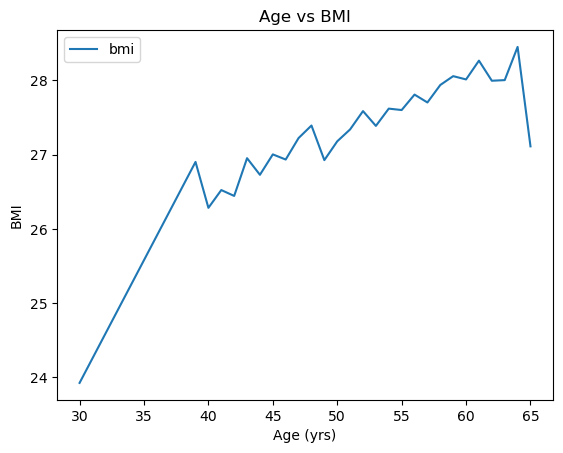

In [57]:
# Plotting age with respect to body-mass index (bmi).
df.groupby("age")[[ "bmi"]].mean().plot()
plt.title("Age vs BMI")
plt.xlabel("Age (yrs)")
plt.ylabel("BMI")

The normal range of bmi comes under 18.5 to 25 for a healthy human. This analysis shows that all the adults examined for this dataset are overweight. The bmi is increasing with age

###### Age With Respect To Blood Pressure

Text(0, 0.5, 'Blood Pressure (mmHg)')

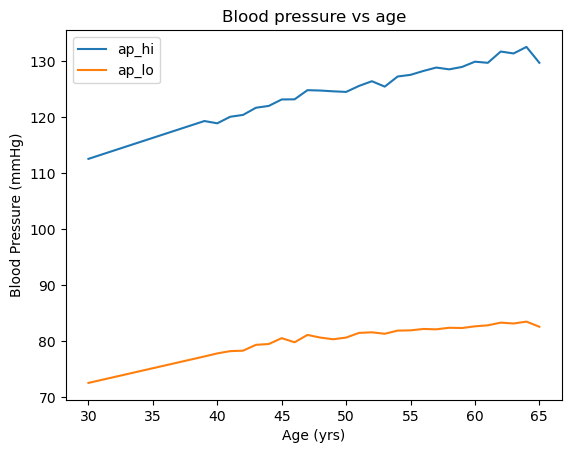

In [58]:
# Plotting age with respect to the blood pressure (both systolic and diastolic)
df.groupby("age")[[ "ap_hi", "ap_lo"]].mean().plot()
plt.title("Blood pressure vs age")
plt.xlabel("Age (yrs)")
plt.ylabel("Blood Pressure (mmHg)")

- the blood pressure of the patients increases with age
- The patients between the age of 30 to 65 years have an increasing diastolic pressure ranging between 70 to 80mmHg and increasing systolic pressure ranging between 110 to 135mmHg.

###### Age With Respect To Cholesterol Level

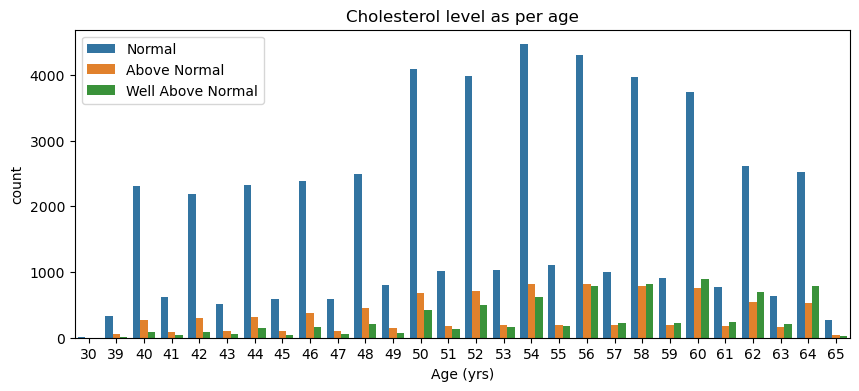

In [59]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "cholesterol")
plt.title("Cholesterol level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

- cholesterol level increases with age and most of the patients have normal cholesterol level
-  level of cholesterol of patients fastly starts increasing to go above normal and well above normal mostly at the age of 50 years. When there is too much cholesterol in the blood, it builds up in the walls of the arteries, causing a process called atherosclerosis, a form of heart disease. The arteries become narrowed and bloodflow to the heart muscle is slowed down or blocked. This can cause chest pain (angina) or a heart attack. That's why high cholesterol level in adults can cause a serious problem

###### Age With Respect To Glucose Level

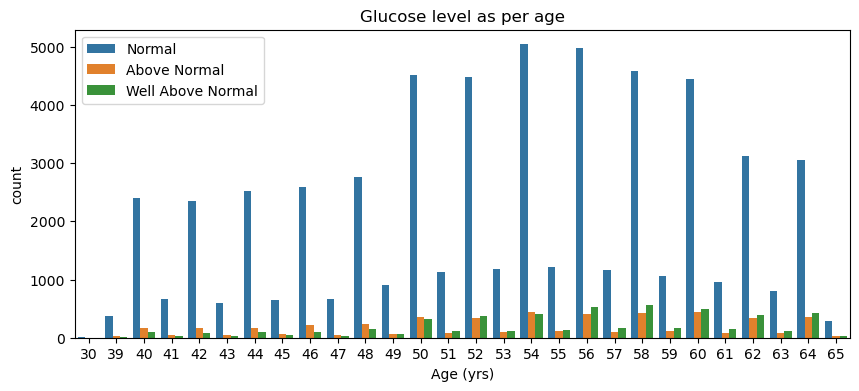

In [60]:
# Plotting age with respect to glucose level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "glucose")
plt.title("Glucose level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

- glucose level of most of the patients are normal
- level of glucose of patients fastly starts increasing to go above normal and well above normal mostly at the age of 50 years. High blood sugar levels can damage blood vessels and the nerves that control the heart over time, leading to an increased risk of heart diseases.

###### Age With Respect To Smoking

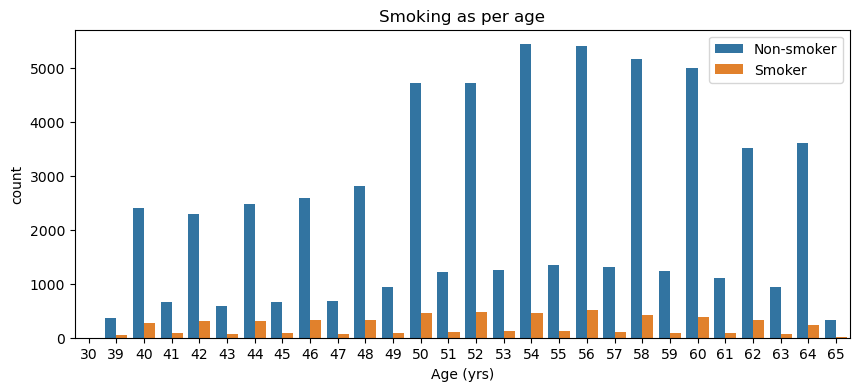

In [61]:
# Plotting age with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "smoke")
plt.title("Smoking as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Non-smoker", "Smoker"])

most of the patients don't smoke and with increase in age most of the adults don't prefer to smoke

###### Age With Respect To Alcohol Consumption

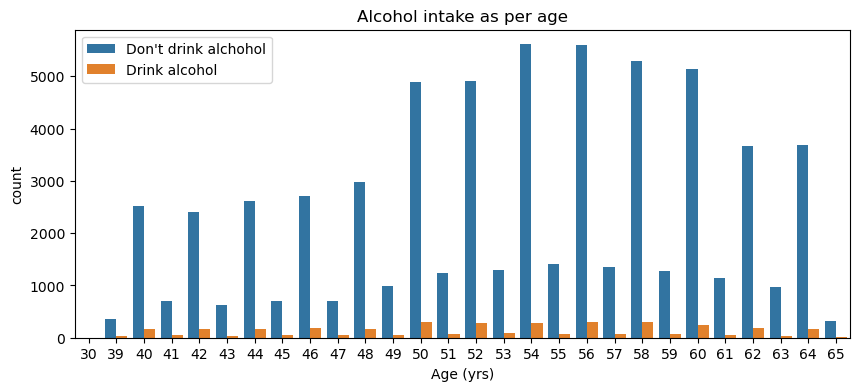

In [62]:
# Plotting age with respect to alcohol consumption.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "alcohol_intake")
plt.title("Alcohol intake as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Don't drink alchohol", "Drink alcohol"])

 most of the patients don't drink alcohol and with increase in age most of the adults don't prefer to drink alcohol

###### Age With Respect To Physical Activity

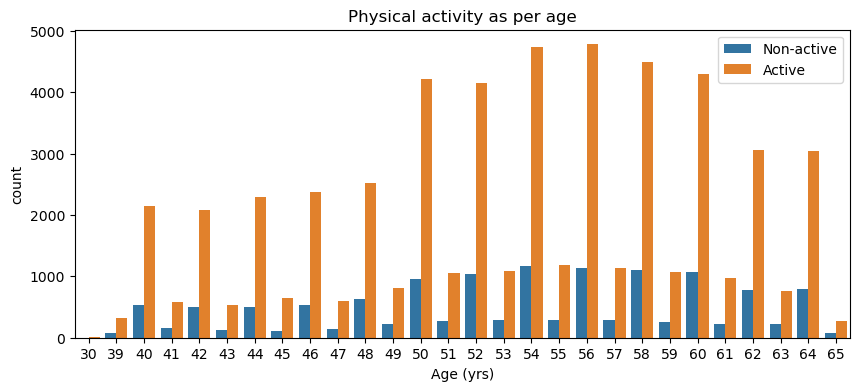

In [64]:
# Plotting age with respect to physical activity.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "active")
plt.title("Physical activity as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Non-active", "Active"])

 most of the patients are physically active

###### Age With Respect To Occurrence Of Cardiovascular Disease

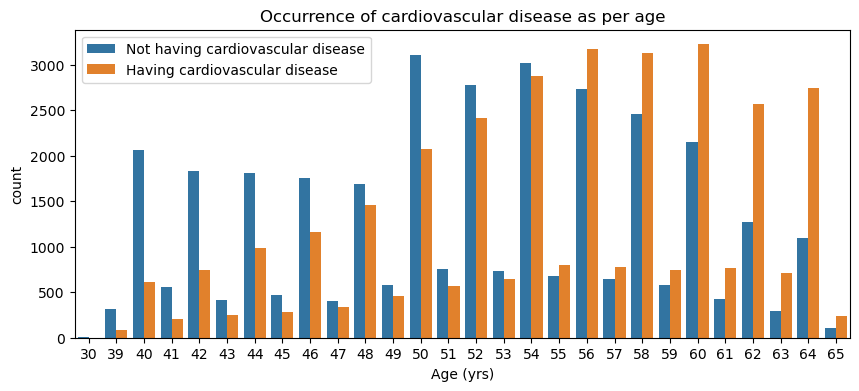

In [65]:
# Plotting age with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "cvd")
plt.title("Occurrence of cardiovascular disease as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

-  with the increase in age, the problem of occuring cardiovascular disease is very high
- possibilities are highest above the age of 56


###### Analysis Of Gender

In [67]:
# Percentage of each value present in 'male' column.
df["gender"].value_counts()/len(df["gender"])*100

Women    65.126997
Men      34.873003
Name: gender, dtype: float64

most of the patients are women. 65% are women and 35% are men

In [71]:
df.groupby(by = "gender").mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cvd,bmi,bmi_class
gender,,,,,,,,,,,,,,
Men,50091.339031,53.110606,169.947469,77.177333,128.018386,82.257984,1.330693,1.209456,0.21917,0.106312,0.806554,0.499833,26.724157,2.838239
Women,49907.963121,53.442594,161.370711,72.487532,125.863980,80.906128,1.382945,1.234848,0.01777,0.025427,0.801674,0.492265,27.950776,3.066190


* Men are taller than women.
* Weight of men is more than women.
* Most often the systolic blood pressure is high in men above 120 than women.
* Most often the diastolic blood pressure is high in men above 80 than women.

###### Analysis Of Gender With Respect To Blood Pressure

In [73]:
# Mean of gender with respect to the blood pressure.
df.groupby("gender")[[ "ap_hi", "ap_lo"]].mean()

,ap_hi,ap_lo
gender,,
Men,128.018386,82.257984
Women,125.863980,80.906128


male patients mostly have high systolic and diastolic blood pressure in comparison to women

###### Gender With Respect To Cholesterol Level

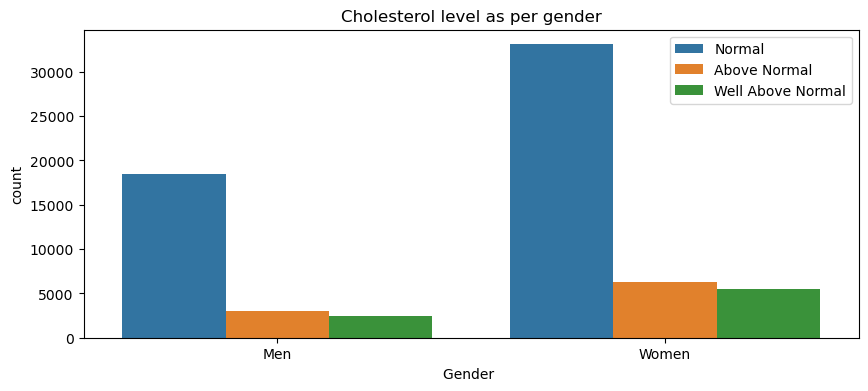

In [75]:
# Plotting gender with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "cholesterol")
plt.title("Cholesterol level as per gender")
plt.xlabel("Gender ")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

most of the male and female patients have normal cholesterol level whereas the number of patients having cholesterol level above normal and well above normal is low. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the cholesterol level of male and female with each other

###### Gender With Respect To Glucose Level

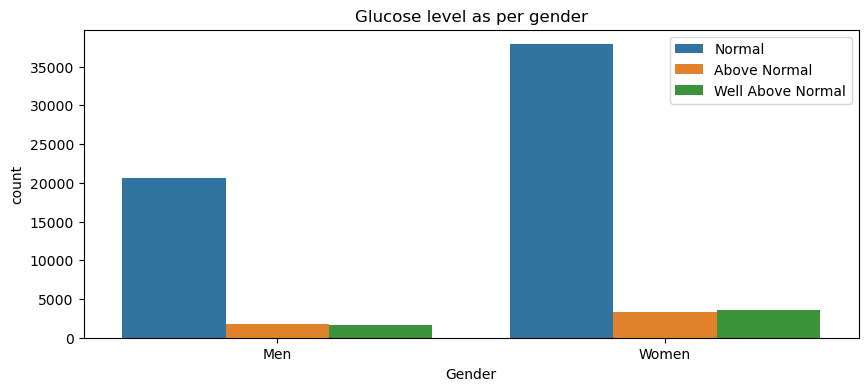

In [77]:
# Plotting gender with respect to glucose level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "glucose")
plt.title("Glucose level as per gender")
plt.xlabel("Gender")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

most of the male and female patients have normal glucose level whereas the number of patients having glucose level above normal and well above normal is low. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the glucose level of male and female with each other

###### Gender With Respect To Smoking

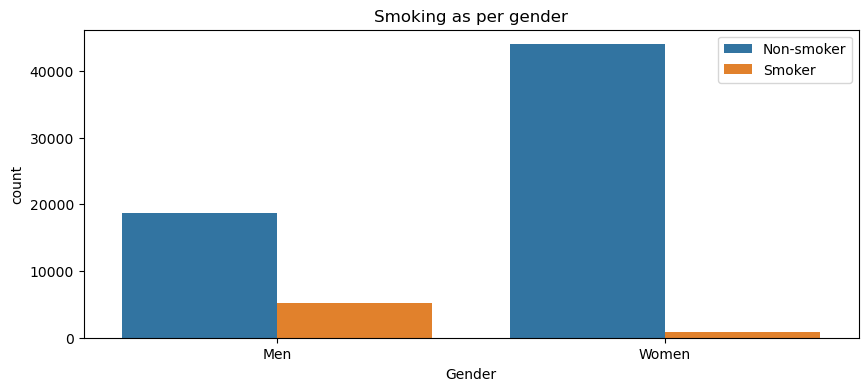

In [78]:
# Plotting gender with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "smoke")
plt.title("Smoking as per gender")
plt.xlabel("Gender")
plt.legend(["Non-smoker", "Smoker"])

 most of the male and female patients don't smoke. The frequency of males who smoke are much higher than that of women. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the smoking population of male and female with each other

###### Gender With Respect To Alcohol Consumption

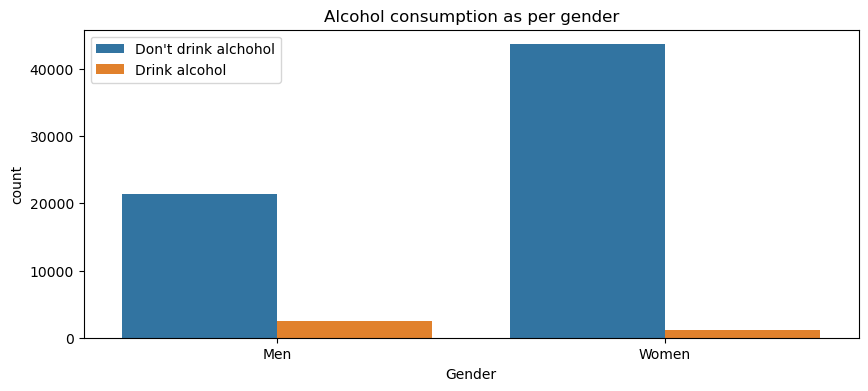

In [80]:
# Plotting gender with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "alcohol_intake")
plt.title("Alcohol consumption as per gender")
plt.xlabel("Gender")
plt.legend(["Don't drink alchohol", "Drink alcohol"])

most of the male and female patients don't drink alcohol. The frequency of male who drink are much higher than that of women. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot clearly compare the alcohol consumption of male and female with each other.

###### Gender With Respect To Physical Activity

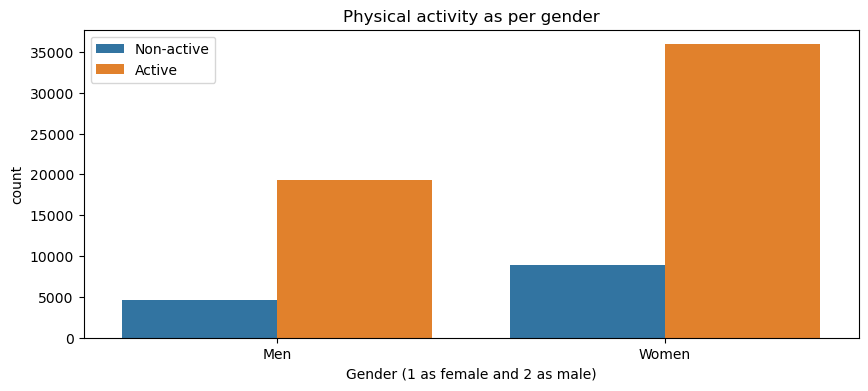

In [81]:
# Plotting gender with respect to physical activity.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "active")
plt.title("Physical activity as per gender")
plt.xlabel("Gender (1 as female and 2 as male)")
plt.legend(["Non-active", "Active"])

most of the male and female patients do regular physical activity. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the physical activity of male and female with each other

###### Gender With Respect To Occurrence Of Cardiovascular Disease

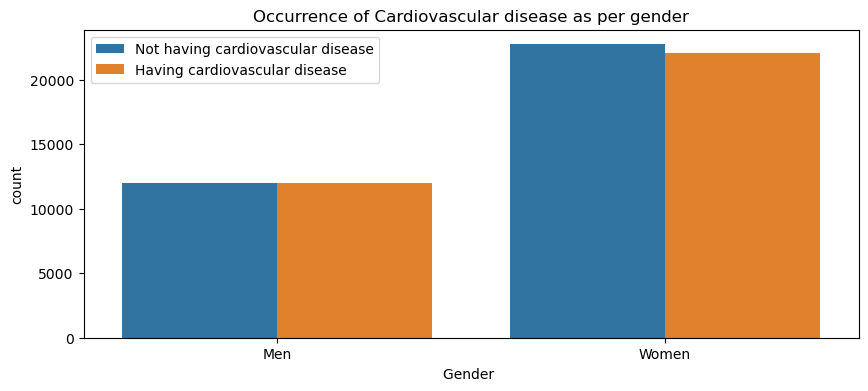

In [82]:
# Plotting gender with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "cvd")
plt.title("Occurrence of Cardiovascular disease as per gender")
plt.xlabel("Gender ")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

approximately equal proportion of male and female are having and not having cardiovascular disease. The data of number of female patients present in the dataset is higher than that of male patients, so that's why we cannot compare the occurrence of cardiovascular disease in male and female with each other

###### Height With Respect To Occurrence Of Cardiovascular Disease

In [83]:
# Mean of heights of the patient having and not having cardiovascular disease.
df.groupby("cvd")[[ "height"]].mean()

,height
cvd,
0,164.449181
1,164.272385


mostly the height of the patients are normal and that's why have no special effect is seen on the occurrence of cardiovascular disease due to height

###### Weight With Respect To Occurrence Of Cardiovascular Disease

In [84]:
# Mean of weights of the patient having and not having cardiovascular disease.
df.groupby("cvd")[[ "weight"]].mean()

,weight
cvd,
0,71.573924
1,76.724583


 most of the patients having more weight will have higher chances of having cardiovascular disease.

###### BMI With Respect To Occurrence Of Cardiovascular Disease

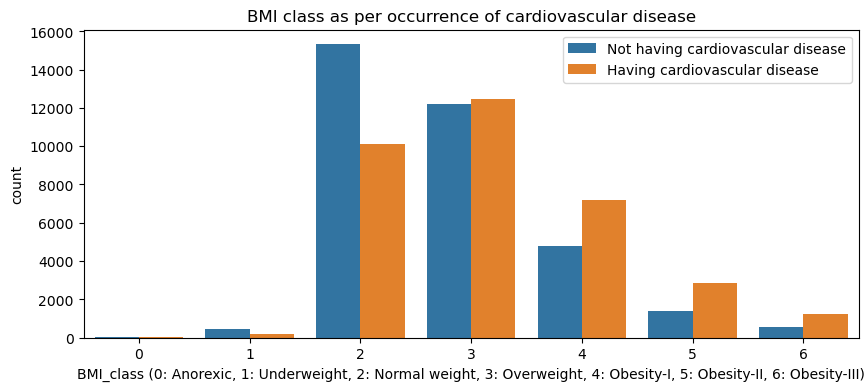

In [85]:
# Plotting BMI class with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "bmi_class",  hue = "cvd")
plt.title("BMI class as per occurrence of cardiovascular disease")
plt.xlabel("BMI_class (0: Anorexic, 1: Underweight, 2: Normal weight, 3: Overweight, 4: Obesity-I, 5: Obesity-II, 6: Obesity-III)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

 the patients who are overweight and obese have more risk to cardiovascular disease. The chances of "not having cardiovascular disease" is higher than "having cardiovascular disease" in normal weight bmi range of class-2.

###### Cholesterol Level With Respect To Occurrence Of Cardiovascular Disease

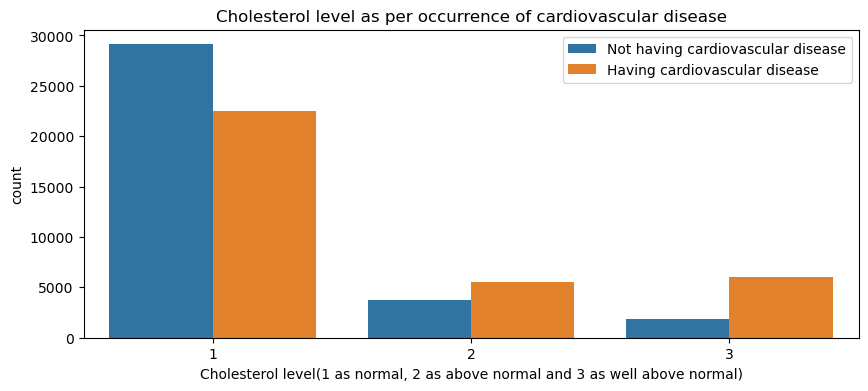

In [88]:
# Plotting cholesterol level with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "cholesterol",  hue = "cvd")
plt.title("Cholesterol level as per occurrence of cardiovascular disease")
plt.xlabel("Cholesterol level(1 as normal, 2 as above normal and 3 as well above normal)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

 the high number of patients having normal cholesterol level will have a moderate chance of having cardiovascular disease. But the small number of patients who have a above normal and a well above normal level of cholesterol will have a higher chance of having cardiovascular diesease

###### Glucose Level With Respect To Occurrence Of Cardiovascular Disease

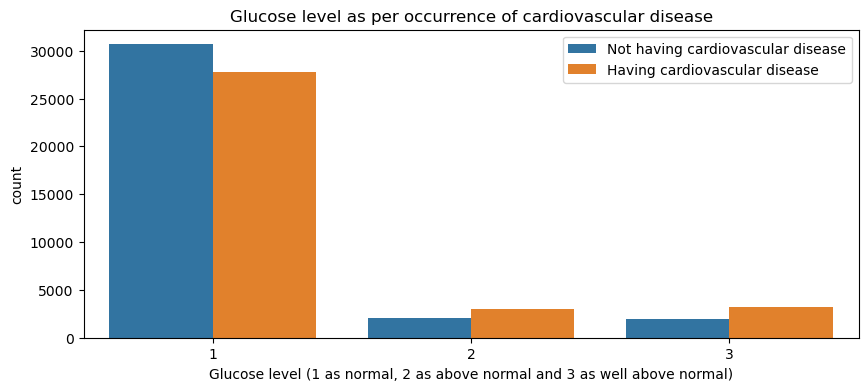

In [87]:
# Plotting glucose level with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "glucose",  hue = "cvd")
plt.title("Glucose level as per occurrence of cardiovascular disease")
plt.xlabel("Glucose level (1 as normal, 2 as above normal and 3 as well above normal)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

the high number of patients having normal glucose level will have a moderate chance of having cardiovascular disease. But the small number of patients who have a above normal and a well above normal level of glucose will have a higher chance of having cardiovascular diesease

###### Smoking With Respect To Occurrence Of Cardiovascular Disease

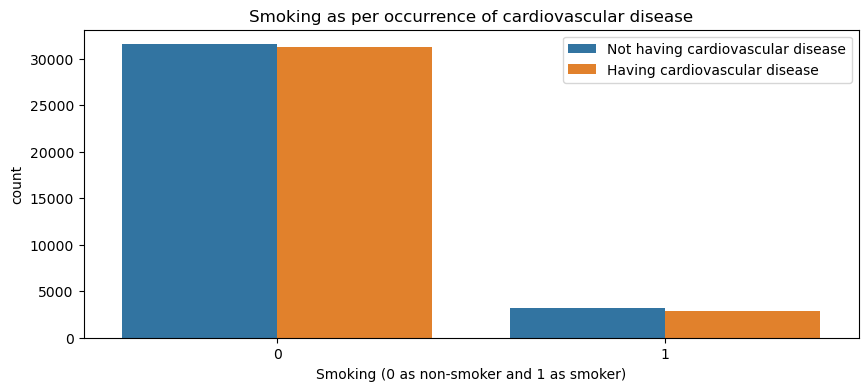

In [89]:
# Plot of smoking with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "smoke",  hue = "cvd")
plt.title("Smoking as per occurrence of cardiovascular disease")
plt.xlabel("Smoking (0 as non-smoker and 1 as smoker)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

 the patients who don't smoke will have a higher chance of having cardiovascular disease than those who smoke. This could be only possible if the patients who don't smoke are exposed to passive smoking or the environment in which he/she is living or working is polluted 

###### Alcohol Consumption With Respect To Occurrence Of Cardiovascular Disease

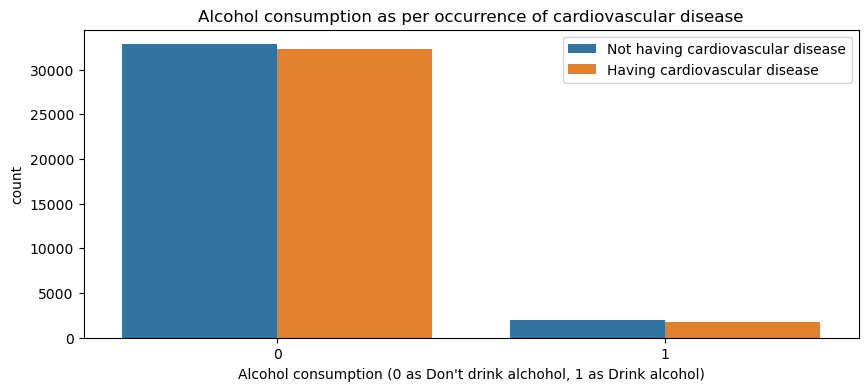

In [90]:
# Plotting alcohol consumption with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "alcohol_intake",  hue = "cvd")
plt.title("Alcohol consumption as per occurrence of cardiovascular disease")
plt.xlabel("Alcohol consumption (0 as Don't drink alchohol, 1 as Drink alcohol)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

 the patients who don't drink alcohol will have higher chances of having cardiovascular disease than those who drink alcohol. It is important to note that some of the patients in this dataset could be alcohol abstainers who previously drank excessively and had undermined their health. After they quit, they call themselves as non-alcoholic and categorized as non-drinkers, which in turn lead to more sick people in the non-drinkers category

###### Physical Activity With Respect To Occurrence Of Cardiovascular Disease

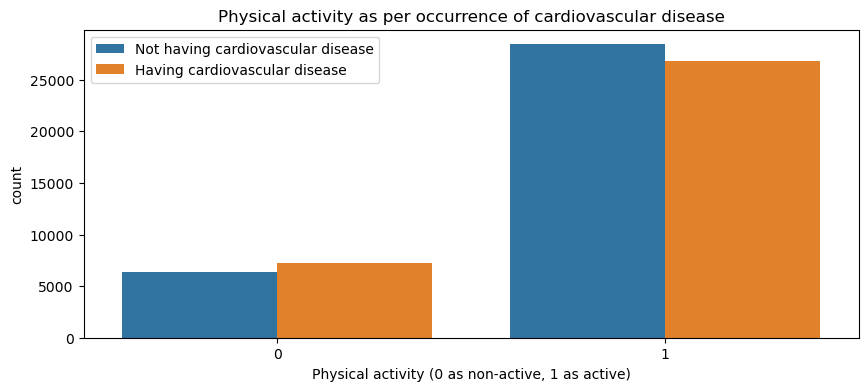

In [91]:
# Plotting physical activity with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "active",  hue = "cvd")
plt.title("Physical activity as per occurrence of cardiovascular disease")
plt.xlabel("Physical activity (0 as non-active, 1 as active)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

This analysis shows that non-active patients have higher chances of having cardiovascular disease whereas active patients have lower chances of having cardiovascular disease. But the dataset of 'Having cardiovascular disease' of active patients is higher than non-active patients because of the extreme strength-based laborious worklife conditions of the physically active patients. It means that the active patients mostly do high strength-based physical labour without any proper nutrition or guidance. This is also a fact, that this data could be examined from weight-lifters, wrestlers, fighters and atheletes because of their high-strength based work but there is one more fact associated, that these people mostly train themselves with proper guidance, routine and nutrition which decreases there chance of having cardiovascular disease. By observing this analysis, we can assume that this dataset is collected from manual labours because these labours do a lot of strength-based work without proper nutrition and health checkups.

**CONCLUSIONS:**
- minimum age of patients is 30 and maximum age is 65,so patients included in the age group inclusively between 30 to 65
- most of the patients are women.
- there are 671 patients with height less than 147 and 2 patients with height than 200,which are outliers
- approximately 75.5% of patients have normal, 13.5% have above normal and 11.5% have well above normal level of cholesterol
- approximately 85% of patients have normal, 7.6% have above normal and 7.17% have well above normal level of glucose
- approximately 94.6% of patient do not intake alcohol whereas 5.3% intake alcohol
- approximately 80.3% of patient performs regular physical activity whereas 19.6% do not perform regular physical activity
- approximately 51% of patients do not have cardiovascular disease whereas 48% of patients suffers from cardiovascular disease
- 35.86% of the patients have normal weight but 64.14% have heavy weight which can be a problem as it could cause cardiovascular disease